In [1]:
# R code to plot heatmap (all 377 radiomics features)
library("openxlsx")
library("stringr")
library(ComplexHeatmap)
library(circlize)
library(colorspace)
library(GetoptLong)
library(ggplot2)
library(gplots)


Loading required package: grid
ComplexHeatmap version 1.18.1
Bioconductor page: http://bioconductor.org/packages/ComplexHeatmap/
Github page: https://github.com/jokergoo/ComplexHeatmap
Documentation: http://bioconductor.org/packages/ComplexHeatmap/

If you use it in published research, please cite:
Gu, Z. Complex heatmaps reveal patterns and correlations in multidimensional 
  genomic data. Bioinformatics 2016.

circlize version 0.4.4
CRAN page: https://cran.r-project.org/package=circlize
Github page: https://github.com/jokergoo/circlize
Documentation: http://jokergoo.github.io/circlize_book/book/

If you use it in published research, please cite:
Gu, Z. circlize implements and enhances circular visualization 
  in R. Bioinformatics 2014.


Attaching package: 'gplots'

The following object is masked from 'package:stats':

    lowess



In [2]:
library("RColorBrewer")

In [3]:
# install.packages('OpasnetUtils')
library(reticulate)

In [4]:
data_path = "./Data/"
output_path = "./Results/"

In [15]:
# load all features
xlfeatures = read.xlsx(paste(data_path , "allBlockData.xlsx",sep = ""), sheet = 1, colNames = TRUE)

xlfeatures = data.frame(xlfeatures)

In [16]:
colnames(xlfeatures)

[1] "X1"                                                
  [2] "ID"                                                
  [3] "FIRSTORDER_10Percentile"                           
  [4] "FIRSTORDER_90Percentile"                           
  [5] "FIRSTORDER_Energy"                                 
  [6] "FIRSTORDER_Entropy"                                
  [7] "FIRSTORDER_InterquartileRange"                     
  [8] "FIRSTORDER_Kurtosis"                               
  [9] "FIRSTORDER_Maximum"                                
 [10] "FIRSTORDER_MeanAbsoluteDeviation"                  
 [11] "FIRSTORDER_Mean"                                   
 [12] "FIRSTORDER_Median"                                 
 [13] "FIRSTORDER_Minimum"                                
 [14] "FIRSTORDER_Range"                                  
 [15] "FIRSTORDER_RobustMeanAbsoluteDeviation"            
 [16] "FIRSTORDER_RootMeanSquared"                        
 [17] "FIRSTORDER_Skewness"                               
 [18] "FIRSTORDER_TotalEnergy"                            
 [19] "FIRSTORDER_Uniformity"                             
 [20] "FIRSTORDER_Variance"                               
 [21] "GLCM_Autocorrelation"                              
 [22] "GLCM_ClusterProminence"                            
 [23] "GLCM_ClusterShade"                                 
 [24] "GLCM_ClusterTendency"                              
 [25] "GLCM_Contrast"                                     
 [26] "GLCM_Correlation"                                  
 [27] "GLCM_DifferenceAverage"                            
 [28] "GLCM_DifferenceEntropy"                            
 [29] "GLCM_DifferenceVariance"                           
 [30] "GLCM_Id"                                           
 [31] "GLCM_Idm"                                          
 [32] "GLCM_Idmn"                                         
 [33] "GLCM_Idn"                                          
 [34] "GLCM_Imc1"                                         
 [35] "GLCM_Imc2"                                         
 [36] "GLCM_InverseVariance"                              
 [37] "GLCM_JointAverage"                                 
 [38] "GLCM_JointEnergy"                                  
 [39] "GLCM_JointEntropy"                                 
 [40] "GLCM_MaximumProbability"                           
 [41] "GLCM_SumAverage"                                   
 [42] "GLCM_SumEntropy"                                   
 [43] "GLCM_SumSquares"                                   
 [44] "GLRLM_GrayLevelNonUniformity"                      
 [45] "GLRLM_GrayLevelNonUniformityNormalized"            
 [46] "GLRLM_GrayLevelVariance"                           
 [47] "GLRLM_HighGrayLevelRunEmphasis"                    
 [48] "GLRLM_LongRunEmphasis"                             
 [49] "GLRLM_LongRunHighGrayLevelEmphasis"                
 [50] "GLRLM_LongRunLowGrayLevelEmphasis"                 
 [51] "GLRLM_LowGrayLevelRunEmphasis"                     
 [52] "GLRLM_RunEntropy"                                  
 [53] "GLRLM_RunLengthNonUniformity"                      
 [54] "GLRLM_RunLengthNonUniformityNormalized"            
 [55] "GLRLM_RunPercentage"                               
 [56] "GLRLM_RunVariance"                                 
 [57] "GLRLM_ShortRunEmphasis"                            
 [58] "GLRLM_ShortRunHighGrayLevelEmphasis"               
 [59] "GLRLM_ShortRunLowGrayLevelEmphasis"                
 [60] "GLSZM_GrayLevelNonUniformity"                      
 [61] "GLSZM_GrayLevelNonUniformityNormalized"            
 [62] "GLSZM_GrayLevelVariance"                           
 [63] "GLSZM_HighGrayLevelZoneEmphasis"                   
 [64] "GLSZM_LargeAreaEmphasis"                           
 [65] "GLSZM_LargeAreaHighGrayLevelEmphasis"              
 [66] "GLSZM_LargeAreaLowGrayLevelEmphasis"               
 [67] "GLSZM_LowGrayLevelZoneEmphasis"                    
 [68] "GLSZM_SizeZoneNonUniformity"              

In [17]:
features = xlfeatures[,3:length(colnames(xlfeatures))]

In [18]:
# fat volumes (ml), age
features$Age <- features$Age*10
features$VFat <- features$VFat*1000
features$SFat <- features$SFat*1000


In [19]:
length(colnames(features))

[1] 386

In [20]:
features[1,1:377]

FIRSTORDER_10Percentile,FIRSTORDER_90Percentile,FIRSTORDER_Energy,FIRSTORDER_Entropy,FIRSTORDER_InterquartileRange,FIRSTORDER_Kurtosis,FIRSTORDER_Maximum,FIRSTORDER_MeanAbsoluteDeviation,FIRSTORDER_Mean,FIRSTORDER_Median,...,WAVELET_HHH_glrlm_LongRunLowGrayLevelEmphasis,WAVELET_HHH_glrlm_LowGrayLevelRunEmphasis,WAVELET_HHH_glrlm_RunEntropy,WAVELET_HHH_glrlm_RunLengthNonUniformity,WAVELET_HHH_glrlm_RunLengthNonUniformityNormalized,WAVELET_HHH_glrlm_RunPercentage,WAVELET_HHH_glrlm_RunVariance,WAVELET_HHH_glrlm_ShortRunEmphasis,WAVELET_HHH_glrlm_ShortRunHighGrayLevelEmphasis,WAVELET_HHH_glrlm_ShortRunLowGrayLevelEmphasis
-123,-64,9173273286,1.994426,30,3.266972,35,18.41644,-95.36548,-97,...,0.2301288,0.05135526,2.757282,218259.7,0.4008569,0.570217,1.373333,0.6416824,13.16942,0.03299019


In [21]:
imagefeatures = features[, 1:(length(colnames(features))-9)]
imagefeatures = scale(imagefeatures)
features[, 1:(length(colnames(features))-9)] = imagefeatures

In [22]:
features = features[c(colnames(imagefeatures), 'Age', 'Gender', 'VFat' ,'SFat', 'IsCTVO', 'IsIR' ,'IsMS')] 

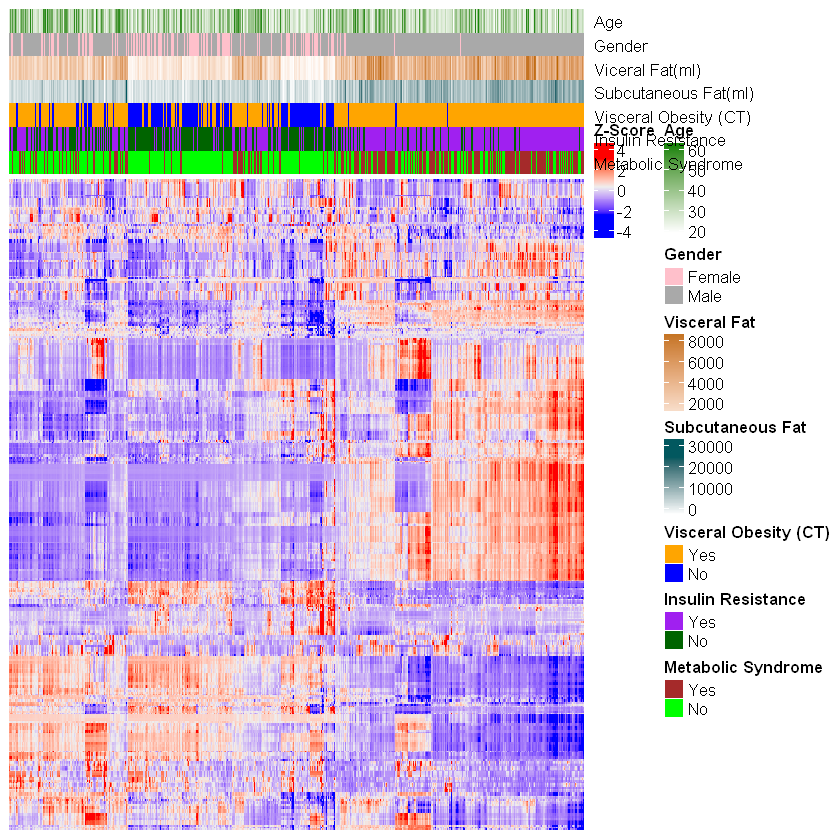

In [26]:
# plot heatmap
ha1 = HeatmapAnnotation(df = features[,378:length(colnames(features))],
    col = list(

               IsCTVO = c("1"="Orange","0"="blue"), IsIR = c("1"="purple","0"="darkgreen"),
                IsMS = c("1"="Brown","0"="green"),
        Gender = c("1"= "pink", "0"= "darkgray")

    ),
                       
     annotation_legend_param = list(
               IsCTVO = list(title = "Visceral Obesity (CT)", at = c("1", "0"), labels = c("Yes", "No")),
               IsIR = list(title = "Insulin Resistance", at = c("1", "0"), labels = c("Yes", "No")),
         VFat = list(title = "Visceral Fat"),
         SFat = list(title = "Subcutaneous Fat"),
      IsMS = list(title = "Metabolic Syndrome", at = c("1", "0"), labels = c("Yes", "No")),
       Gender = list(title = "Gender", at = c("1", "0"), labels = c("Female", "Male"))
         
      )
   )

ht = Heatmap(t(features[,1:377]), name = "Z-Score",row_names_gp = gpar(fontsize = 8),
        show_row_dend = FALSE,show_column_dend = FALSE, cluster_rows = TRUE,
        cluster_columns = TRUE, show_row_names = FALSE, show_column_names = FALSE,clustering_distance_columns = "pearson",
        show_heatmap_legend = TRUE,
       ,top_annotation=ha1)



p = draw(ht, heatmap_legend_side = "right")
decorate_annotation("IsIR", {grid.text("Insulin Resistance", unit(1, "npc") + unit(2, "mm"), 0.5, default.units = "npc", just = "left" , gp = gpar(fontsize = 10))})
decorate_annotation("IsCTVO", {grid.text("Visceral Obesity (CT)", unit(1, "npc") + unit(2, "mm"), 0.5, default.units = "npc", just = "left" , gp = gpar(fontsize = 10))})
decorate_annotation("IsMS", {grid.text("Metabolic Syndrome", unit(1, "npc") + unit(2, "mm"), 0.5, default.units = "npc", just = "left" , gp = gpar(fontsize = 10))})
decorate_annotation("Age", {grid.text("Age", unit(1, "npc") + unit(2, "mm"), 0.5, default.units = "npc", just = "left" , gp = gpar(fontsize = 10))})
decorate_annotation("Gender", {grid.text("Gender", unit(1, "npc") + unit(2, "mm"), 0.5, default.units = "npc", just = "left" , gp = gpar(fontsize = 10))})
decorate_annotation("SFat", {grid.text("Subcutaneous Fat(ml)", unit(1, "npc") + unit(2, "mm"), 0.5, default.units = "npc", just = "left" , gp = gpar(fontsize = 10))})
decorate_annotation("VFat", {grid.text("Viceral Fat(ml)", unit(1, "npc") + unit(2, "mm"), 0.5, default.units = "npc", just = "left" , gp = gpar(fontsize = 10))})

In [27]:
# save to file
title = paste(output_path , "inner_block_for_heatmap_allfeatures.tif",sep = "")
tiff(title, width=900*3, height=800*3, units="px", res=96*3, compression = "lzw")
p = draw(ht, heatmap_legend_side = "right")
decorate_annotation("IsIR", {grid.text("Insulin Resistance", unit(1, "npc") + unit(2, "mm"), 0.5, default.units = "npc", just = "left" , gp = gpar(fontsize = 10))})
decorate_annotation("IsCTVO", {grid.text("Visceral Obesity (CT)", unit(1, "npc") + unit(2, "mm"), 0.5, default.units = "npc", just = "left" , gp = gpar(fontsize = 10))})
decorate_annotation("IsMS", {grid.text("Metabolic Syndrome", unit(1, "npc") + unit(2, "mm"), 0.5, default.units = "npc", just = "left" , gp = gpar(fontsize = 10))})
decorate_annotation("Age", {grid.text("Age", unit(1, "npc") + unit(2, "mm"), 0.5, default.units = "npc", just = "left" , gp = gpar(fontsize = 10))})
decorate_annotation("Gender", {grid.text("Gender", unit(1, "npc") + unit(2, "mm"), 0.5, default.units = "npc", just = "left" , gp = gpar(fontsize = 10))})
decorate_annotation("SFat", {grid.text("Subcutaneous Fat(ml)", unit(1, "npc") + unit(2, "mm"), 0.5, default.units = "npc", just = "left" , gp = gpar(fontsize = 10))})
decorate_annotation("VFat", {grid.text("Viceral Fat(ml)", unit(1, "npc") + unit(2, "mm"), 0.5, default.units = "npc", just = "left" , gp = gpar(fontsize = 10))})
dev.off()





png 
  2